In [1]:
from settings import Settings
import matplotlib.pyplot as plt

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from utils.datasets import TrainDataset, TestDataset
from torchvision.transforms import *
from torch.autograd import Variable
from model import Net
from tensorboardX import SummaryWriter

In [2]:
settings = Settings()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [3]:
def load_dataset(dataset='train'):
    if settings.num_channels == 1:
        is_gray = True
    else:
        is_gray = False

    if dataset == 'train':
        print('Loading train datasets...')
        train_set = TrainDataset(settings=settings)
        return DataLoader(dataset=train_set, num_workers=settings.num_threads, batch_size=settings.batch_size,
                          shuffle=True)
    elif dataset == 'test':
        print('Loading test datasets...')
        test_set = TestDataset(settings=settings)
        return DataLoader(dataset=test_set, num_workers=settings.num_threads, batch_size=settings.test_batch_size,
                          shuffle=False)

In [4]:
def save_checkpoint(model, epoch):
    model_out_path = "checkpoint/" + "model_epoch_{}.pth".format(epoch)
    state = {"epoch": epoch ,"model": model}
    if not os.path.exists("checkpoint/"):
        os.makedirs("checkpoint/")

    torch.save(state, model_out_path)

    print("Checkpoint saved to {}".format(model_out_path))

In [5]:
def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 10 every 10 epochs"""
    lr = settings.lr * (0.1 ** (epoch // 10))
    return lr

In [6]:
def train(training_data_loader, optimizer, model, criterion, epoch, writer, log_iter):
    lr = adjust_learning_rate(optimizer, epoch)
    
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr
        
    print("Epoch = {}, lr = {}".format(epoch, optimizer.param_groups[0]["lr"]))
    avg_loss = 0.0
    for iteration, batch in enumerate(training_data_loader, 1):
        input, target = Variable(batch[2]), Variable(batch[1], requires_grad=False)

        input = input.to(device)
        target = target.to(device)

        loss = criterion(model(input), target)
        optimizer.zero_grad()
        loss.backward() 
        nn.utils.clip_grad_norm_(model.parameters(), settings.clip) 
        optimizer.step()
        writer.add_scalar('loss/iteration_loss', loss.item()/settings.batch_size, log_iter)
        avg_loss += loss.item()
        log_iter += 1
        if iteration%100 == 0:
            print("===> Epoch[{}]({}/{}): Loss: {:.10f}".format(epoch, iteration, len(training_data_loader), loss.data[0]))
    writer.add_scalar('loss/batch_loss', avg_loss/len(training_data_loader), epoch)
    return log_iter

In [7]:
train_data = load_dataset('train')

Loading train datasets...
Successfully loaded.
/Users/fylsunghwan/Documents/Workspace/GitHub/VDSR-pytorch/datasets/291


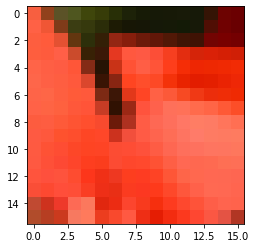

In [8]:
test_data = train_data.dataset.__getitem__(4)
plt.imshow(test_data[0].numpy().transpose((2, 1, 0)))

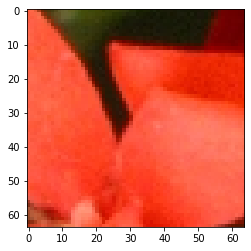

In [9]:
plt.imshow(test_data[1].numpy().transpose((2, 1, 0)))

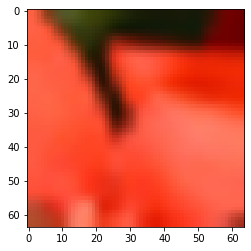

In [10]:
plt.imshow(test_data[2].numpy().transpose((2, 1, 0)))

In [ ]:
model = Net()
writer = SummaryWriter()

optimizer = optim.SGD(model.parameters(), lr=settings.lr, momentum=0.9, weight_decay=1e-4)
criterion = nn.MSELoss()

total_epoch = 101
total_iter = 0

for epoch in range(total_epoch):
    total_iter = train(train_data, optimizer, model, criterion, epoch, writer=writer, log_iter=total_iter)
    save_checkpoint(model, epoch)

Epoch = 0, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_0.pth
Epoch = 1, lr = 0.1


/usr/local/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv_Block. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.7/si

Checkpoint saved to checkpoint/model_epoch_1.pth
Epoch = 2, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_2.pth
Epoch = 3, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_3.pth
Epoch = 4, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_4.pth
Epoch = 5, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_5.pth
Epoch = 6, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_6.pth
Epoch = 7, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_7.pth
Epoch = 8, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_8.pth
Epoch = 9, lr = 0.1
Checkpoint saved to checkpoint/model_epoch_9.pth
Epoch = 10, lr = 0.010000000000000002
Checkpoint saved to checkpoint/model_epoch_10.pth
Epoch = 11, lr = 0.010000000000000002
Checkpoint saved to checkpoint/model_epoch_11.pth
Epoch = 12, lr = 0.010000000000000002
Checkpoint saved to checkpoint/model_epoch_12.pth
Epoch = 13, lr = 0.010000000000000002
Checkpoint saved to checkpoint/model_epoch_13.pth
Epoch = 14, lr = 0.010000000000000002
Checkpoin

In [ ]:
writer = SummaryWriter()